Analysis of 100 simulations results on a network of four boroughs without (case 1) and with a variation of the commuting matrix (case 2) during the simulations.
Here I present the results concerning the number of recovered in each borough at the end of the simulations, in order to visualize the differences in the pandemic spreading and incidence due to the possible reduction in commuting between the different districts.
Simulations have been performed with $R_0$ = 3.

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.lines as mlines
import numpy as np
import statsmodels.api as ssm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [43]:
df_novarcomm = pd.read_excel("/home/claudia/Scrivania/Tesi NYC pandemic /Modello_mobility_prova4x4/Analysis/NoVariationsCommuting.xlsx")
df_varcomm_1w = pd.read_excel("/home/claudia/Scrivania/Tesi NYC pandemic /Modello_mobility_prova4x4/Analysis/VariationsComm_1w.xlsx")

df_novarcomm.rename(columns = {'Unnamed: 0' : 'Simulations', 'Queens ' : 'Queens'}, inplace = True)
df_varcomm_1w.rename(columns = {'Unnamed: 0' : 'Simulations','Queens ' : 'Queens'}, inplace = True)

In [45]:
df_varcomm_1w
df_novarcomm


,Simulations,Manhattan,Bronx,Brooklyn,Queens
0,Recovered_0,1548888,1347954,2434826,2143461
1,Recovered_1,1549743,1347624,2435570,2144173
2,Recovered_2,1548571,1347069,2435400,2144212
3,Recovered_3,1548698,1347865,2434312,2143922
4,Recovered_4,1549474,1347844,2434548,2143234
...,...,...,...,...,...
95,Recovered_95,1547724,1348116,2434994,2143996
96,Recovered_96,1548510,1347695,2434958,2143903
97,Recovered_97,1547859,1347274,2433961,2143355
98,Recovered_98,1548494,1348115,2435063,2143787


Text(0, 0.5, 'Recovered')

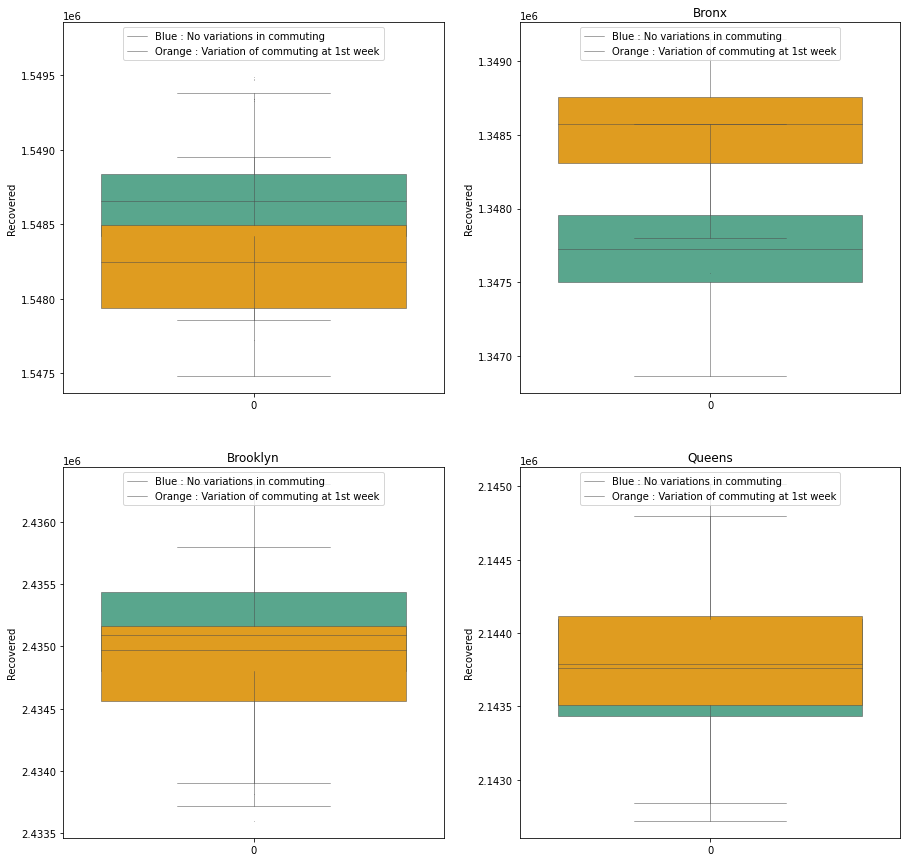

In [113]:
fig, axs = plt.subplots(2,2, figsize = (15,15))
legend = ["Blue : No variations in commuting ", "Orange : Variation of commuting at 1st week"]

sns.boxplot(df_novarcomm['Manhattan'], orient="v", color='#4CB391', linewidth=0.5, fliersize=0.1, ax = axs[0,0])
sns.boxplot(data=df_varcomm_1w['Manhattan'], orient="v", color='Orange', linewidth=0.5, fliersize=0.1, ax = axs[0,0])
axs[0,1].set_title('Manhattan')
axs[0,0].legend(legend, loc = "upper center")
axs[0,0].set_ylabel('Recovered')

sns.boxplot(data=df_novarcomm['Bronx'], orient="v", color='#4CB391', linewidth=0.5, fliersize=0.1, ax = axs[0,1])
sns.boxplot(data=df_varcomm_1w['Bronx'], orient="v", color='Orange', linewidth=0.5, fliersize=0.1, ax= axs[0,1])
axs[0,1].set_title('Bronx')
axs[0,1].legend(legend, loc = "upper center", markerscale = 60)
axs[0,1].set_ylabel('Recovered')

sns.boxplot(data=df_novarcomm['Brooklyn'], orient="v", color='#4CB391', linewidth=0.5, fliersize=0.1, ax = axs[1,0])
sns.boxplot(data=df_varcomm_1w['Brooklyn'], orient="v", color='Orange', linewidth=0.5, fliersize=0.1, ax = axs[1,0])
axs[1,0].set_title('Brooklyn')
axs[1,0].legend(legend, loc = "upper center")
axs[1,0].set_ylabel('Recovered')

sns.boxplot(data=df_novarcomm['Queens'], orient="v", color='#4CB391', linewidth=0.5, fliersize=0.1, ax = axs[1,1])
sns.boxplot(data=df_varcomm_1w['Queens'], orient="v", color='Orange', linewidth=0.5, fliersize=0.1, ax = axs[1,1])
axs[1,1].set_title("Queens")
axs[1,1].legend(legend, loc = "upper center")
axs[1,1].set_ylabel('Recovered')


